In [73]:
# Dependencies
import json
import tweepy 
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Twitter API Keys
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [113]:
# Target Search Term
target_terms = ("@BBC", "@CBS", "@CNN","@Fox", "@nytimes")

In [114]:
# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

In [116]:
# Array to hold sentiment
sentiment_array = []
tweet_num = 1

# Loop through all target users
for target in target_terms:
    public_tweets = api.search(target, count=100)
   
    # Loop through all tweets
    for tweet in public_tweets["statuses"]:
        # Use filters to check if user meets conditions
        if (tweet["user"]["followers_count"] < max_followers and
            tweet["user"]["statuses_count"] > min_tweets and
            tweet["user"]["statuses_count"] < max_tweets and
            tweet["user"]["friends_count"] < max_following and
            tweet["user"]["lang"] == lang):

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add each value to the appropriate array
            sentiment_array.append ({"Media Source" : target,
                                    "Text" : tweet["text"],
                                    "Tweet Date" : tweet["created_at"],
                                    "Compound" : compound,
                                    "Positive" : pos,
                                    "Negative" : neg,
                                    "Neutral" : neu,
                                    "Tweet Count" : tweet_num
                                   })
            tweet_num += 1


In [120]:
tweet_summary = pd.DataFrame.from_dict(sentiment_array)
tweet_summary.groupby("Media Source")["Compound"].mean()

Media Source
@BBC        0.153562
@CBS        0.294124
@CNN       -0.066072
@Fox       -0.022680
@nytimes   -0.007513
Name: Compound, dtype: float64

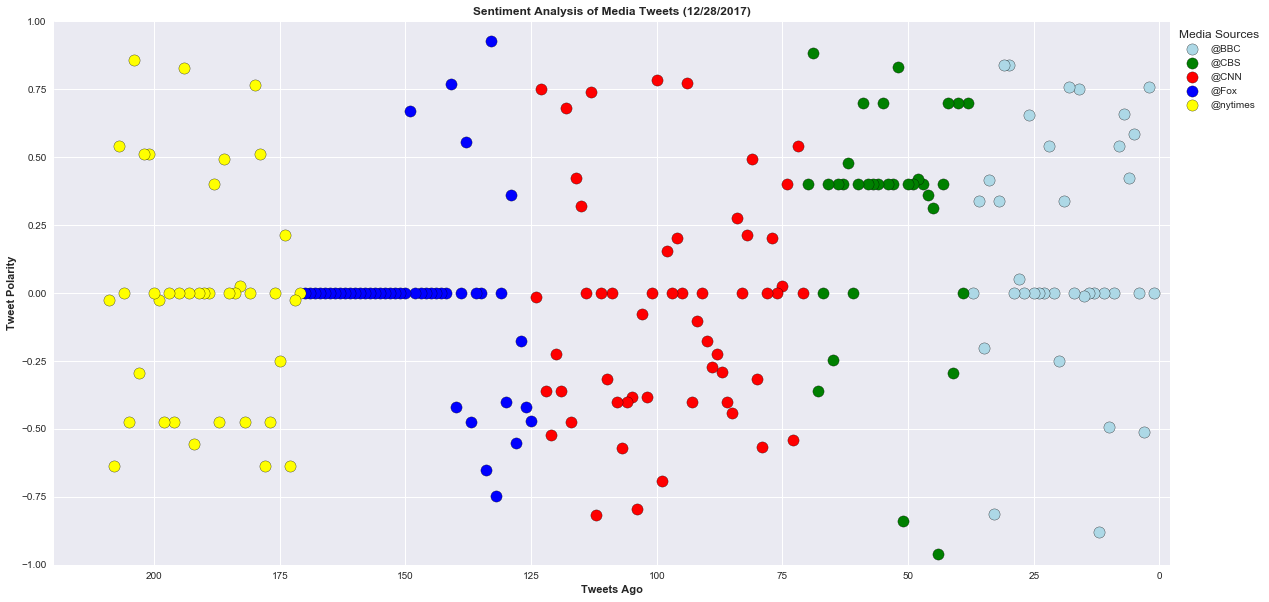

In [127]:
news_colors={"@BBC": "lightblue",
             "@CBS":"green", 
             "@CNN":"red",
             "@Fox":"blue",
             "@nytimes": "yellow"}

sns.set()

plt.figure(figsize = (20,10))

plt.xlabel("Tweets Ago",fontweight='bold')
plt.ylabel("Tweet Polarity",fontweight='bold')
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.xlim(220,-2, -1)
plt.ylim(-1,1)

for newschannel in news_colors.keys():
    x = tweet_summary["Tweet Count"][tweet_summary["Media Source"] == newschannel]
    y = tweet_summary["Compound"][tweet_summary["Media Source"] == newschannel]
    plt.scatter(x,y, label = newschannel, color = news_colors[newschannel], edgecolor = "black", s=125)

#plt.scatter(x,y, label = newschannel, color = news_colors[newschannel], edgecolor = "black", s=125)
    plt.legend(bbox_to_anchor = (1,1), title = 'Media Sources')    
plt.show()

Media Source
@BBC        0.153562
@CBS        0.294124
@CNN       -0.066072
@Fox       -0.022680
@nytimes   -0.007513
Name: Compound, dtype: float64


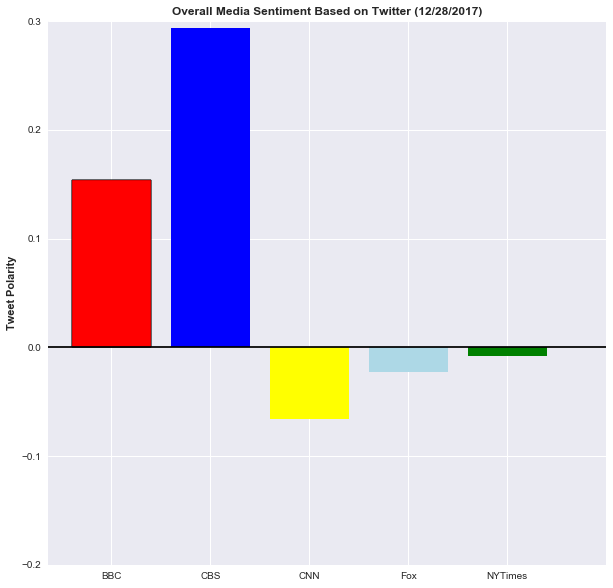

In [147]:
sns.set()

tweetSummaryCompound = tweet_summary.groupby("Media Source")["Compound"].mean()
x_axis = np.arange(len(tweetSummaryCompound))

print(tweetSummaryCompound)

plt.figure(figsize = (10,10))

for newschannel in news_colors.keys():
    #x_axis = tweet_summary["Tweet Count"][tweet_summary["Media Source"] == newschannel]
    plt.bar(x_axis,tweetSummaryCompound, color = {"blue","yellow", "red", "lightblue", "green"}, label = newschannel, edgecolor = "black")
    
plt.ylim(-.2, .3)
plt.ylabel("Tweet Polarity",fontweight='bold')
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYTimes"]
x_locations = [value for value in np.arange(6)]#tick locations
plt.xticks(x_locations, x_labels)
plt.show()


In [ ]:
'''
Oberservations: 

1. CBS had the most positive sentiments on twitter for 12/28/2017
2. CNN had the most negative sentiments on twitter for 12/28/2017
3. BBC and CBS had the positve sentiments on twitter for 12/28/2017

'''